In [26]:
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/composite_methods'

In [27]:
csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/composite_methods/composite_methods.csv'

Create Your Own Data PRN

In [23]:
data = {
    'Frontal Lobe': {'CSF': 0.49, 'Surface': -0.03, 'GM': -0.14, 'WM': -0.07},
    'Parietal Lobe': {'CSF': 0.39, 'Surface': -0.06, 'GM': -0.19, 'WM': -0.16},
    'Occipital Lobe': {'CSF': 0.28, 'Surface': 0.03, 'GM': 0.21, 'WM': 0.27 },
    'Temporal Lobe': {'CSF': 0.56, 'Surface': 0.57, 'GM': 0.25, 'WM': 0.07},
    'Mesial Temporal Lobe': {'CSF': 0.66, 'Surface': 0.42, 'GM': 0.25, 'WM': 0.27},
    'Cerebellum': {'CSF': 0.40, 'Surface': 0.01, 'GM': -.23, 'WM': -.16 },
    'Ventriculomegaly': {'CSF': 0.78, 'Surface': 0.01, 'GM': -0.09, 'WM': 0.04 },
}

In [28]:
import pandas as pd
df = pd.read_csv(csv_path)
# df = df[df['Region'] != 'All']
df

,Imaging Method,R-Squared
0,CSF-GM,0.440
1,CSF-CT,0.320
2,CSF-WM,0.300
3,CSF,0.338


Simple Bar Plot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the data
data = {
    'Imaging Method': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14'],
    'R-squared': [0.187, 0.535, 0.097, 0.163, 0.058, .039, .475, .627, 0.108, 0.146,  0.391, 0.156, 0.148]
}
df = pd.DataFrame(data)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.set_palette("tab10")
sns.barplot(x='R-squared', y='Imaging Method', data=df)

# Customizing the plot
plt.xlim(0, 1)
plt.title('R-squared Values of Questio by Surface Method')
plt.xlabel('R-squared')
plt.ylabel('ADAS-Cog Question')

# Show the plot
plt.show()

Create Barplot Of Methods Within Groups
- The groups to compare within are the top level keys of the dictionary. 
- The groups to compare across are the second-level keys

In [12]:
df.columns

Index(['Imaging Method', 'R-Squared'], dtype='object')

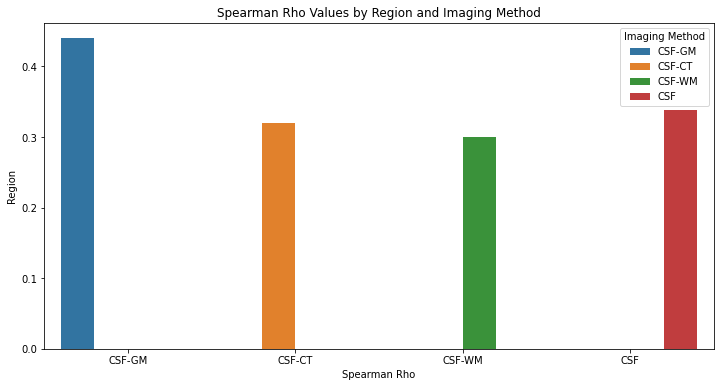

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Flattening the nested dictionary and creating a DataFrame
# flat_data = [(question, method, score) for question, methods in data.items() for method, score in methods.items()]
# df = pd.DataFrame(flat_data, columns=['Region', 'Imaging Method', 'Spearman Rho'])

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='Imaging Method', y='R-Squared', hue='Imaging Method', data=df)

# Customizing the plot
# plt.xlim(-0.25, 1)
plt.title('Spearman Rho Values by Region and Imaging Method')
plt.ylabel('Region')
plt.xlabel('Spearman Rho')
output_file_path = os.path.join(out_dir, 'barplot.svg')
plt.savefig(output_file_path, format='svg')
# Show the plot
plt.show()

Swap Grouping

In [7]:
data

{'Frontal Lobe': {'CSF': 0.49, 'Surface': -0.03, 'GM': -0.14, 'WM': -0.07},
 'Parietal Lobe': {'CSF': 0.39, 'Surface': -0.06, 'GM': -0.19, 'WM': -0.16},
 'Occipital Lobe': {'CSF': 0.28, 'Surface': 0.03, 'GM': 0.21, 'WM': 0.27},
 'Temporal Lobe': {'CSF': 0.56, 'Surface': 0.57, 'GM': 0.25, 'WM': 0.07},
 'Mesial Temporal Lobe': {'CSF': 0.66,
  'Surface': 0.42,
  'GM': 0.25,
  'WM': 0.27},
 'Cerebellum': {'CSF': 0.4, 'Surface': 0.01, 'GM': -0.23, 'WM': -0.16},
 'Ventriculomegaly': {'CSF': 0.78, 'Surface': 0.01, 'GM': -0.09, 'WM': 0.04}}

In [4]:
df

,Imaging Method,R-Squared
0,CSF-CT,0.35
1,CSF-WM,0.34
2,CSF-GM,0.44


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Transpose the data to swap grouping
df = pd.DataFrame(df).T.melt(var_name='Imaging Method', value_name='R-Squared', ignore_index=False).reset_index()

# Create the bar plot with swapped grouping
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='index', y='R-Squared', hue='Imaging Method', data=df)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.title('Agreement With Radiologist')
plt.xlabel('Method')
plt.ylabel('Correlation to Neuroradiologist (Spearman Rho)')

# Save the plot as an SVG file
output_file_path = os.path.join(out_dir, 'barplot_inverted.svg')
plt.savefig(output_file_path, format='svg')

# Show the plot (optional)
plt.show()


TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 864x432 with 0 Axes>